In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
liver_data = pd.read_csv('../datasets/indian_liver_patient.csv')

In [4]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver_data.shape

(583, 11)

In [6]:
liver_data.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<AxesSubplot:>

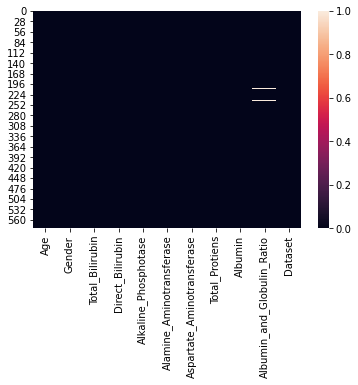

In [7]:
sns.heatmap(liver_data.isnull())

In [8]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

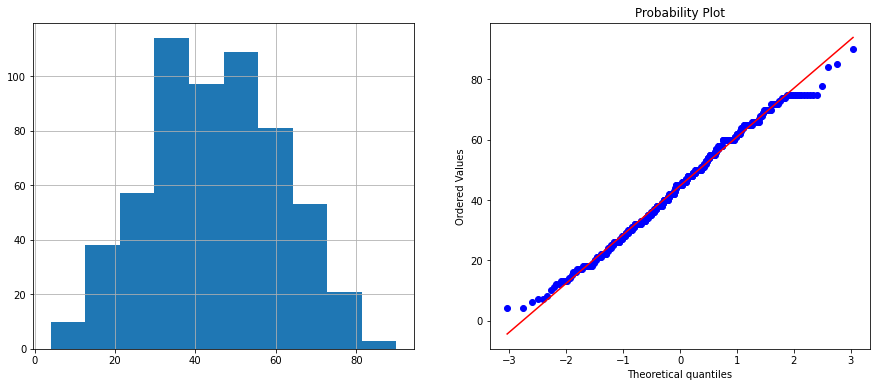

In [9]:
diagnostic_plots(liver_data , 'Age')

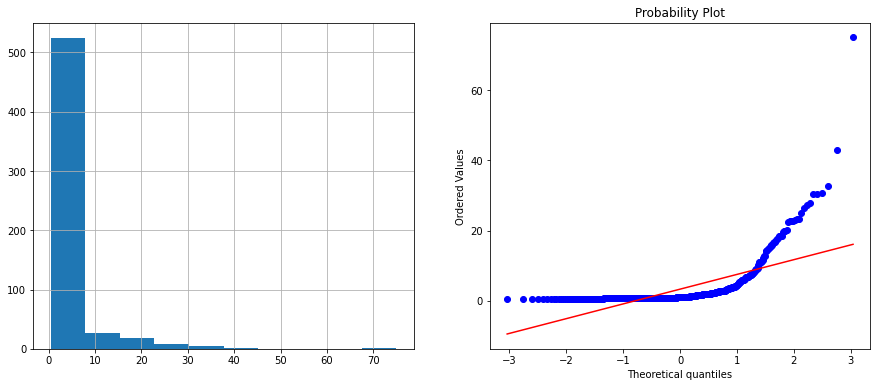

In [10]:
diagnostic_plots(liver_data,'Total_Bilirubin' )     

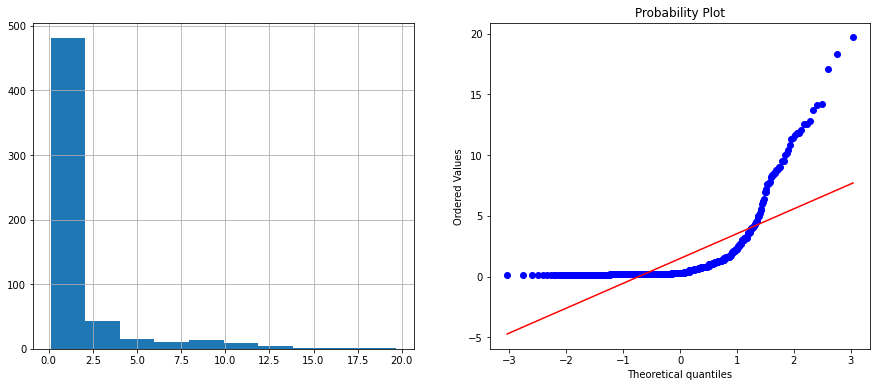

In [11]:
diagnostic_plots(liver_data,'Direct_Bilirubin' ) 

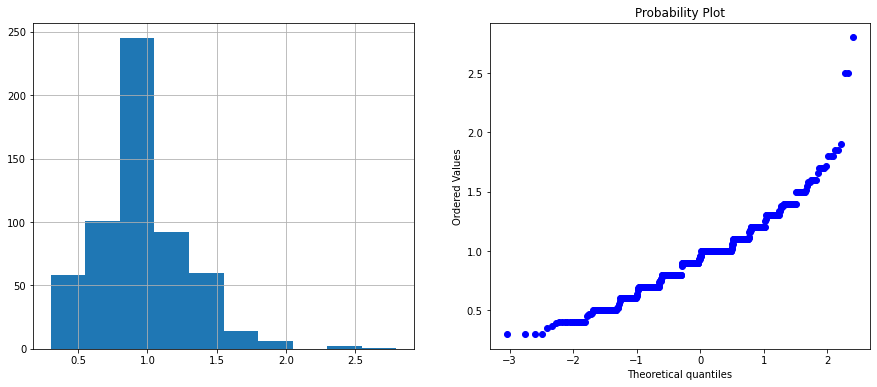

In [12]:
diagnostic_plots(liver_data,'Albumin_and_Globulin_Ratio') 

In [13]:
liver_data['Albumin_and_Globulin_Ratio']= liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].median())

<AxesSubplot:>

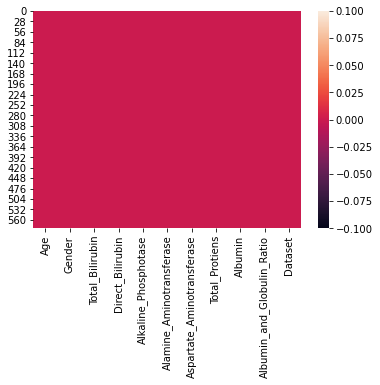

In [14]:
sns.heatmap(liver_data.isnull())

<AxesSubplot:>

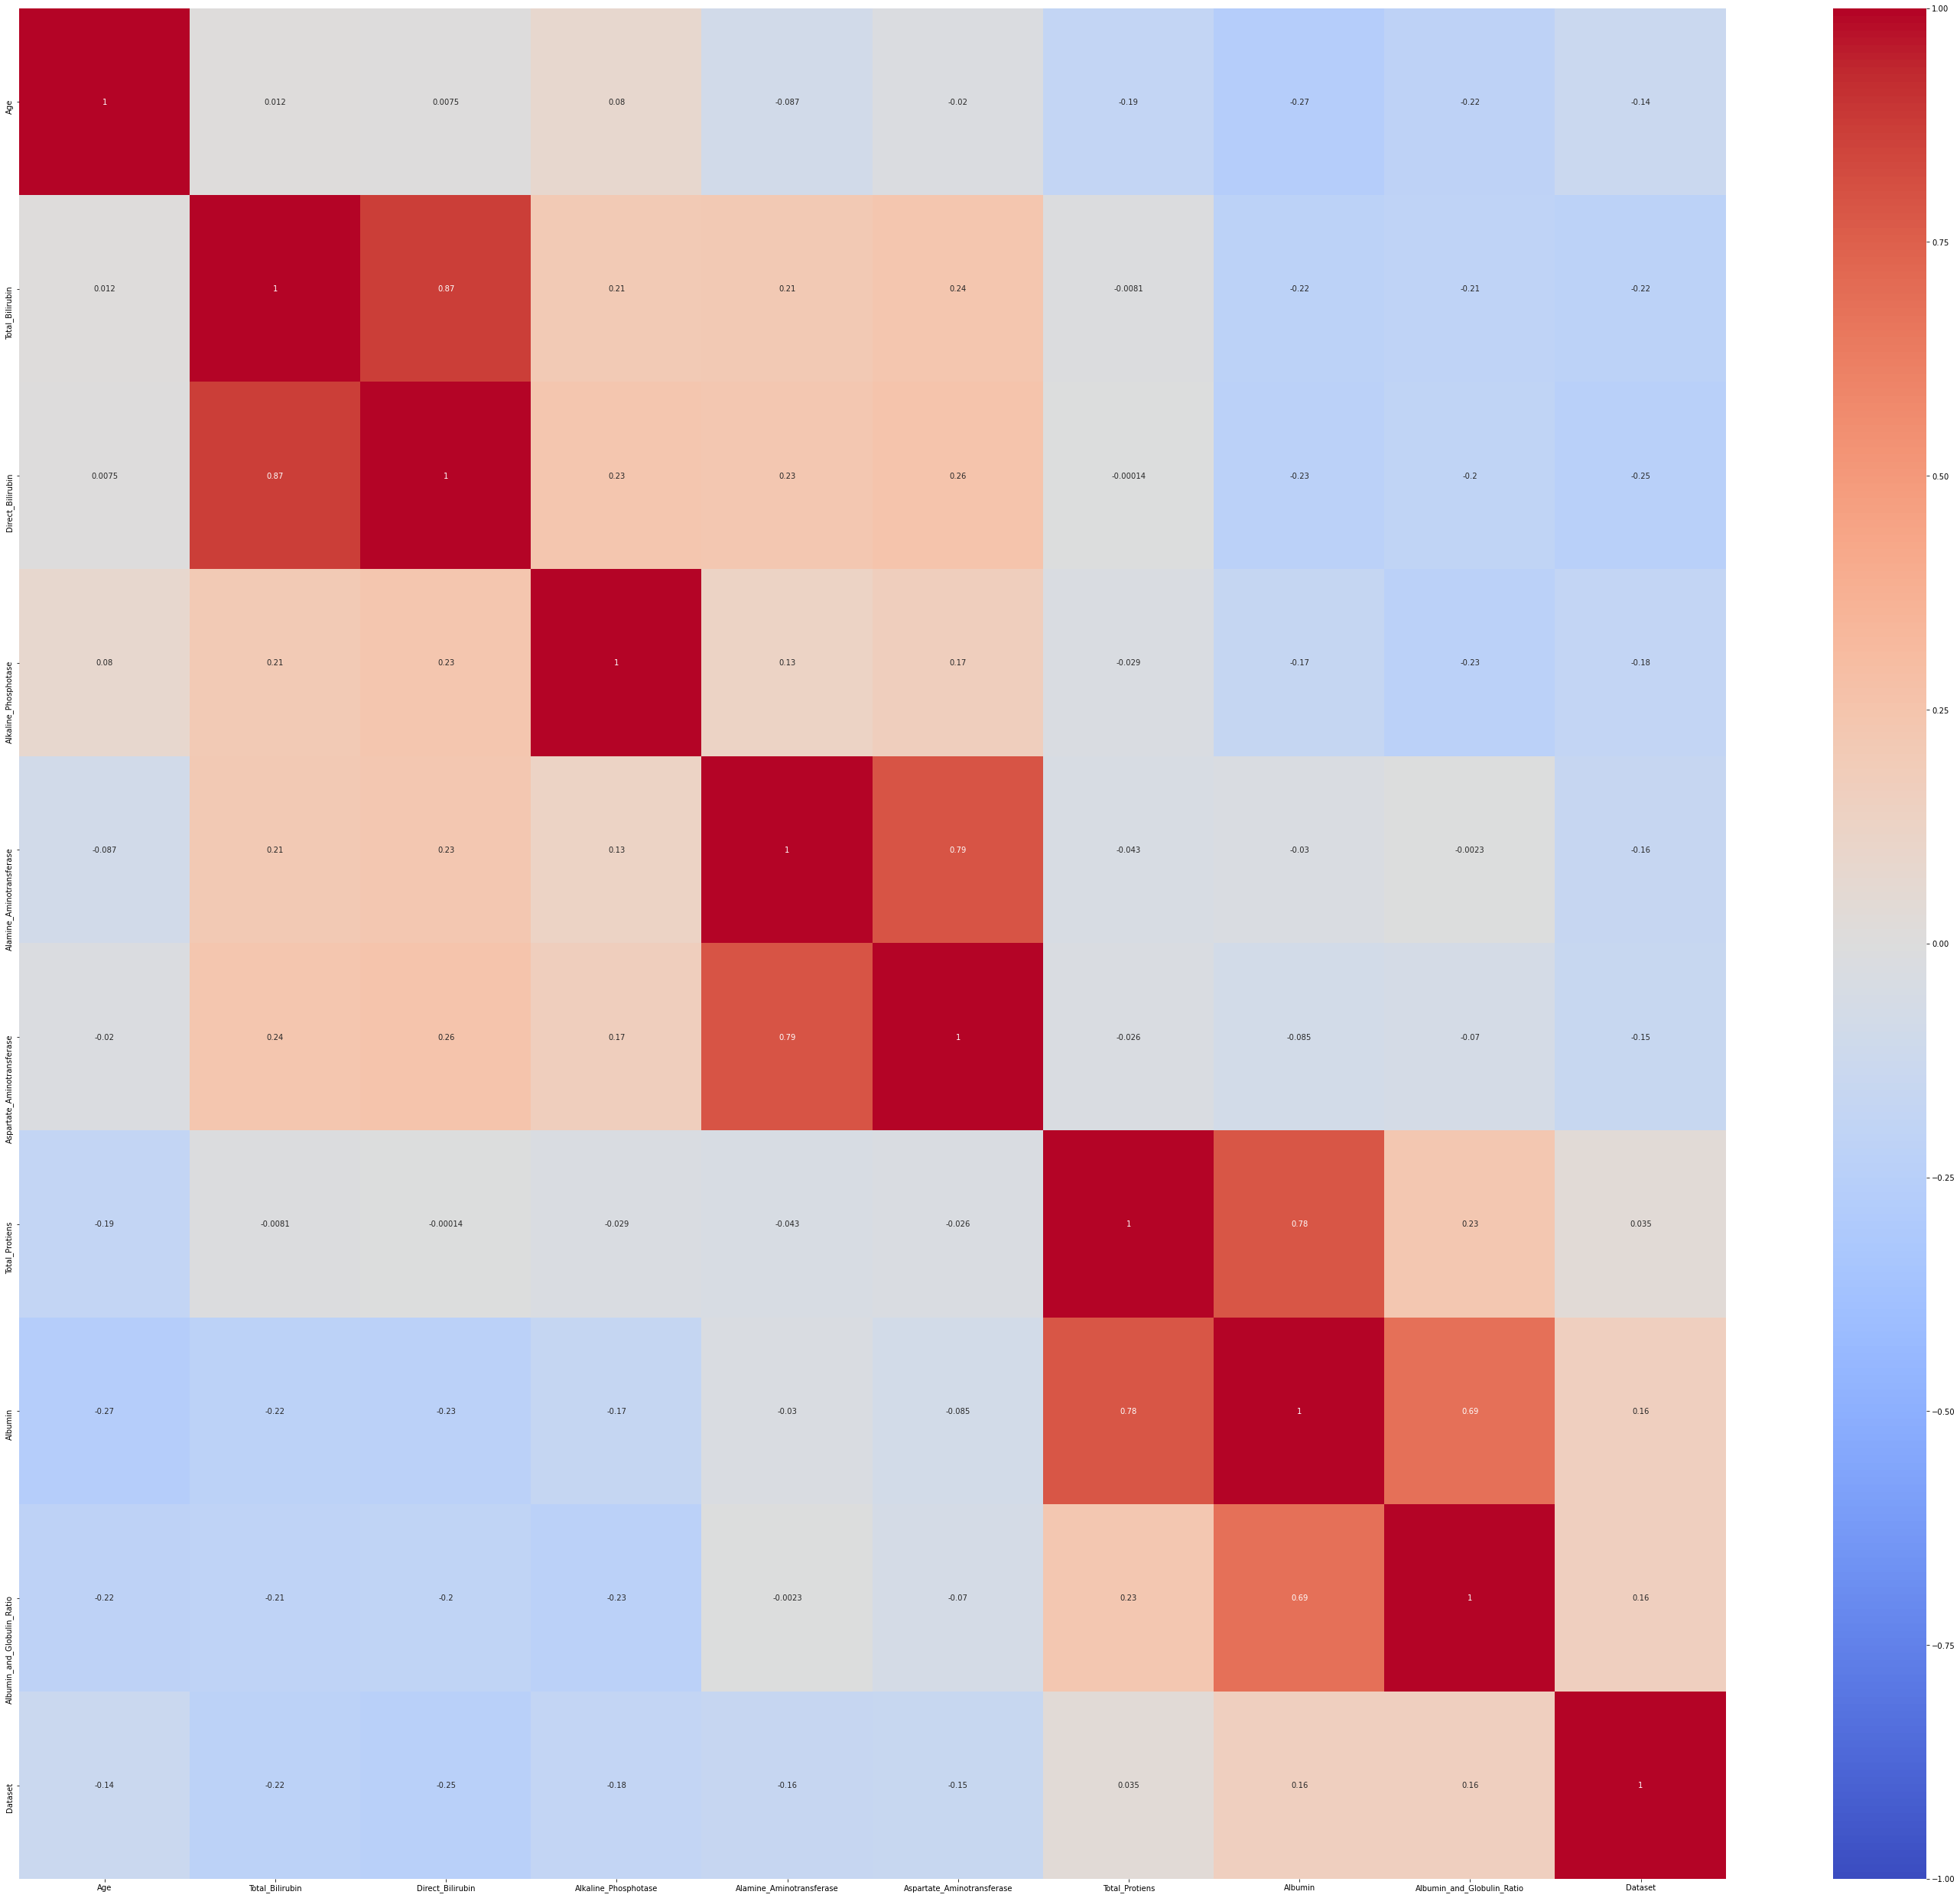

In [15]:
plt.subplots(figsize=(50,45))
sns.heatmap(liver_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [16]:
dummy_gender = pd.get_dummies(liver_data['Gender'] , drop_first =True)

In [17]:
liver_data.drop(['Gender'] , axis=1 , inplace=True)

In [18]:
liver_data = pd.concat([liver_data , dummy_gender] , axis = 'columns')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [42]:
len(liver_data.columns)

11

In [21]:
liver_data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Male']
liver_data[columns] = sc.fit_transform(liver_data[columns])

In [23]:
Y = liver_data['Dataset']
X = liver_data.drop(['Dataset'] , axis=1) 

In [26]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X,Y=smk.fit_sample(X,Y)

In [27]:
X.shape,Y.shape

((794, 10), (794,))

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147529,-1.762281
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650323,0.567446
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178953,0.567446
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166718,0.567446
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.718760,0.567446
...,...,...,...,...,...,...,...,...,...,...
789,-1.900729,-0.422907,-0.485054,0.078989,-0.272456,-0.195416,0.683999,0.702225,0.323851,0.567446
790,-1.715272,-0.386642,-0.443379,-0.180754,-0.264512,-0.260630,0.791830,1.132426,0.795210,0.567446
791,-0.750376,-0.395209,-0.463063,-0.405596,-0.231872,-0.265947,0.728648,1.926901,2.638929,-1.762281
792,0.101088,-0.398771,-0.453918,-0.519348,-0.262908,-0.298894,0.170923,0.788474,0.971775,0.567446


In [40]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Male'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.20 , random_state =42)

In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
classifierrandom = RandomForestClassifier()


In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
random_search1 = RandomizedSearchCV(classifierrandom , param_distributions=param , n_iter=5 , n_jobs=-1, verbose=3 , cv =5 , scoring = 'roc_auc')

In [33]:
random_search1.fit(x_train , y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   17.7s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=3)

In [34]:
random_search1.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [35]:
classifierrandom = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=1400)

In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifierrandom,x_train,y_train,cv=10)
score

array([0.828125  , 0.71875   , 0.84375   , 0.875     , 0.859375  ,
       0.77777778, 0.77777778, 0.85714286, 0.79365079, 0.71428571])

In [37]:
score.mean()

0.8045634920634921

In [38]:
classifier = classifierrandom.fit(x_train , y_train.ravel())

In [39]:
import pickle
filename = 'liver-prediction-model.pkl'
pickle.dump(classifierrandom, open(filename, 'wb'))

In [27]:
y_pred = classifierrandom.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierrandom.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(x_train, y_train)

SVC(kernel='poly')

In [31]:
y_pred = classifierrandom.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierrandom.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [32]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

In [33]:
params = {
    'max_depth' :[3,4,5,6,7,8,9,10],
    'learning_rate':[0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30],
    'n_estimators':[100,500,800],
    'gamma':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4],
    'colsample_bytree' :[0.3,0.4,0.5,0.6],}
    

In [34]:
random_search = RandomizedSearchCV(classifier , param_distributions=params , n_iter=5 , n_jobs=-1, verbose=3 , cv =5 , scoring = 'roc_auc')

In [36]:
random_search.fit(x_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.8s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [37]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train,cv=10)
score

array([0.78125   , 0.6875    , 0.828125  , 0.90625   , 0.890625  ,
       0.80952381, 0.79365079, 0.85714286, 0.77777778, 0.73015873])

In [41]:
score.mean()

0.8062003968253968